<a href="https://colab.research.google.com/github/LSDtopotools/lsdtt_notebooks/blob/master/lsdtopotools_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The full lsdtt stack on colab

If you execute the cells in this notebook, you will have a working copy of *lsdtopotools* (https://lsdtopotools.github.io/LSDTT_documentation/) which includes our visualisation tools and our command line tools. 

This document was last updated by Simon M. Mudd on 18/03/2021

If you use this software for your research, please cite doi:10.5281/zenodo.4577879 (https://zenodo.org/record/4577879#.YFNm8q_7Q2w)

More example notebooks can be found here: https://github.com/LSDtopotools/lsdtt_notebooks and here: https://github.com/simon-m-mudd/smm_teaching_notebooks but for those notebooks to work in colab you will need to run the below installation cells beforehand. 

## First install the python tools

We need to install cartopy without the binary first. If you install using the binary cartopy will not work on colab; I have learned this the hard way. We then install lsdviztools (which will also install a bunch of other geospatial stuff). This step takes about 45 seconds. 

In [ ]:
!pip install cartopy --no-binary cartopy
!pip install lsdviztools

     |████████████████████████████████| 14.4MB 310kB/s 
     |████████████████████████████████| 225kB 39.2MB/s 
Skipping wheel build for cartopy, due to binaries being disabled for it.
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=21e5838ce066f638e592ea19e2546d72abd34c9ebb75cb0104577daff2e76270
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
    Running setup.py install for cartopy ... done
     |████████████████████████████████| 266kB 8.6MB/s 
     |████████████████████████████████| 19.1MB 1.5MB/s 
     |████████████████████████████████| 1.0MB 29.8MB/s 
     |████████████████████████████████| 6.5MB 35.8MB/s 
     |████████████████████████████████| 14.8MB 141kB/s 
  Created wheel for utm: filename=utm-0.7.0-cp37-none-any.whl size=6096 sha256=3ee1bae130f2b22a06b5a23023dca35a2382a586c721c2359c4921235a8d1d40
  Stored in directory: /root/.cache/pip/wheels/d3/a0/c4/93c75

## Now for the lsdtt command line tools

First we download miniconda, which takes about 30 seconds. 

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.8.2-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

The next step is to set the conda channels, install mamba (because it installs lsdtopotools much faster than conda) and then finally lsdtopotools. This takes ~3.5 minutes.

In [ ]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict
!conda install -c conda-forge -y mamba
!mamba install -c conda-forge -y lsdtopotools

Streaming output truncated to the last 5000 lines.
hdf5                     [] (00m:02s) Waiting...
libgfortran-ng           [] (00m:02s) Waiting...
liblapack                [] (00m:02s) Waiting...
libglib                  [] (00m:02s) Waiting...
libdap4                  [] (00m:02s) Waiting...
libpq                    [] (00m:02s) Waiting...
libuuid                  [] (00m:02s) Waiting...
libopenblas              [] (00m:02s) Waiting...
libxcb                   [] (00m:02s) Waiting...
libspatialite            [] (00m:02s) Waiting...
pixman                   [] (00m:02s) Waiting...
numpy                    [] (00m:02s) Waiting...
pcl                      [] (00m:02s) Validating...
poppler-data             [] (00m:02s) Waiting...
qhull                    [] (00m:02s) Waiting...
proj                     [] (00m:02s) Waiting...
tzcode                   [] (00m:02s) Waiting...
xorg-libice              [] (00m:02s) Waiting...
xorg-libxrender          [] (00m:02s) Waiting...
xorg-libxdmcp  

## Test to see if it worked

In [ ]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw

In [ ]:
Dataset_prefix = "SB"
SB_DEM = bmt.ot_scraper(source = "SRTM30",longitude_W = -120.464655, longitude_E = -120.254214, latitude_S = 34.440538, latitude_N = 34.610770,prefix = site_name)
SB_DEM.print_parameters()
SB_DEM.download_pythonic()
DataDirectory = "./"
Fname = Dataset_prefix+"_SRTM30.tif"
gio.convert4lsdtt(DataDirectory,Fname)

The source is: SRTM30
The west longitude is: -120.464655
The east longitude is: -120.254214
The south latitude is: 34.61077
The north latitude is: 34.440538
The path is: ./
The prefix is: SB
I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=34.440538&north=34.61077&west=-120.464655&east=-120.254214&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
Finished downloading
The projections is:
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]
And some extra projection information strings:
None
WGS 84
The centre of the raster is at:
(-120.37972222221434, 34.50555555555218)
dem_data.width is: 758
The latitude and longitude is
34.50555555555218 -120.37972222221434
res tuple is:
(30, 30)
The destination CRS is: EPSG:32610
{'driver': 'GTiff'

'SB_SRTM30_UTM.tif'

In [ ]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "60",
                    "print_slope" : "true"}
r_prefix = Dataset_prefix+"_SRTM30_UTM"
w_prefix = Dataset_prefix+"_SRTM30_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: SB_SRTM30_UTM
The write prefix is: SB_SRTM30_UTM
The parameter dictionary is:
{'write_hillshade': 'true', 'surface_fitting_radius': '60', 'print_slope': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


Your colourbar will be located: right
xsize: 661 and y size: 647
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
minimum values are x: 732452.0 and y: 3813920.0
I made the ticks.
x labels are: 
['735', '738', '741', '744', '747', '750']
x locations are:
[735000.0, 738000.0, 741000.0, 744000.0, 747000.0, 750000.0]
y labels are: 
['3816', '3819', '3822', '3825', '3828', '3831']
y locations are:
[3816000.0, 3819000.0, 3822000.0, 3825000.0, 3828000.0, 3831000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 661 and y size: 647
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 1.0216383307573416
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check th

<Figure size 432x288 with 0 Axes>

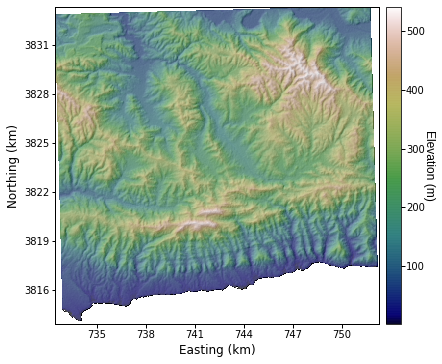

In [ ]:
%matplotlib inline
Base_file = Dataset_prefix+"_SRTM30_UTM"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=False, size_format="geomorphology")